# Code Recap Point
- MDP 구성요소 이해
- MDP 종류
- 튜플, 딕셔너리로 구현되어 있는 MDP 해석 가능한지
    - `(transition, next state, reward, done)`

In [ ]:
!pip install tqdm numpy scikit-learn pyglet setuptools && \
!pip install gym asciinema pandas tabulate tornado==5.* PyBullet && \
!pip install git+https://github.com/pybox2d/pybox2d#egg=Box2D && \
!pip install git+https://github.com/mimoralea/gym-bandits#egg=gym-bandits && \
!pip install git+https://github.com/mimoralea/gym-walk#egg=gym-walk && \
!pip install git+https://github.com/mimoralea/gym-aima#egg=gym-aima && \
!pip install gym[atari]

In [2]:
import gym, gym_walk, gym_aima

# MDPs
1. 부분적으로 관찰 가능한 마르코프 결정 과정 Partial Observable Markov Decision Process `POMDP`
2. 가중치가 더해진 마르코프 결정 과정 Factored Markov Decision Process `FMDP`
3. 시간 행동 상태 연속적인 마르코프 결정 과정 Continuous MDP
4. 관계적 마르코프 결정 과정 Relational MDP `RMDP`
5. 부분 마르코프 결정 과정 Semi MDP `RMDP`
6. 다중 에이전트 마르코프 결정 과정 multi-agent MDP `MMDP`
7. 탈중앙화된 마르코프 결정 과정 Decentralized MDP `Dec-MDP`

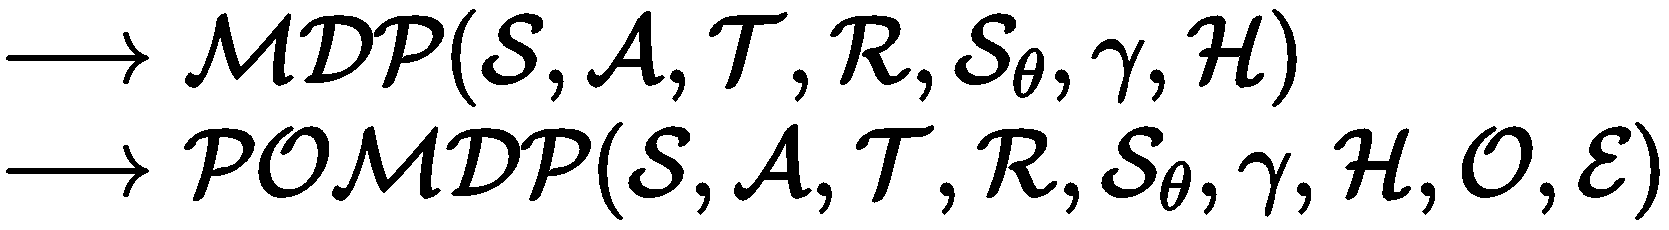



# Bandit Walk

In [3]:
P = {
    0: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 0, 0.0, True)]
    },
    1: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 2, 1.0, True)]
    },
    2: {
        0: [(1.0, 2, 0.0, True)],
        1: [(1.0, 2, 0.0, True)]
    }
}

P

{0: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 2, 1.0, True)]},
 2: {0: [(1.0, 2, 0.0, True)], 1: [(1.0, 2, 0.0, True)]}}

In [4]:
P = gym.make('BanditWalk-v0').env.P
P

{0: {0: [(1.0, 0, 0.0, True), (0.0, 0, 0.0, True), (0.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True), (0.0, 0, 0.0, True), (0.0, 0, 0.0, True)]},
 1: {0: [(1.0, 0, 0.0, True), (0.0, 1, 0.0, False), (0.0, 2, 1.0, True)],
  1: [(1.0, 2, 1.0, True), (0.0, 1, 0.0, False), (0.0, 0, 0.0, True)]},
 2: {0: [(1.0, 2, 0.0, True), (0.0, 2, 0.0, True), (0.0, 2, 0.0, True)],
  1: [(1.0, 2, 0.0, True), (0.0, 2, 0.0, True), (0.0, 2, 0.0, True)]}}

# Bandit Slippery Walk (BSW)

In [5]:
P = {
    0: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 0, 0.0, True)]
    },
    1: {
        0: [(0.8, 0, 0.0, True), (0.2, 2, 1.0, True)],
        1: [(0.8, 2, 1.0, True), (0.2, 0, 0.0, True)]
    },
    2: {
        0: [(1.0, 2, 0.0, True)],
        1: [(1.0, 2, 0.0, True)]
    }
}

P

{0: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 0, 0.0, True)]},
 1: {0: [(0.8, 0, 0.0, True), (0.2, 2, 1.0, True)],
  1: [(0.8, 2, 1.0, True), (0.2, 0, 0.0, True)]},
 2: {0: [(1.0, 2, 0.0, True)], 1: [(1.0, 2, 0.0, True)]}}

In [6]:
P = gym.make('BanditSlipperyWalk-v0').env.P
P

{0: {0: [(0.8, 0, 0.0, True), (0.0, 0, 0.0, True), (0.2, 0, 0.0, True)],
  1: [(0.8, 0, 0.0, True), (0.0, 0, 0.0, True), (0.2, 0, 0.0, True)]},
 1: {0: [(0.8, 0, 0.0, True), (0.0, 1, 0.0, False), (0.2, 2, 1.0, True)],
  1: [(0.8, 2, 1.0, True), (0.0, 1, 0.0, False), (0.2, 0, 0.0, True)]},
 2: {0: [(0.8, 2, 0.0, True), (0.0, 2, 0.0, True), (0.2, 2, 0.0, True)],
  1: [(0.8, 2, 0.0, True), (0.0, 2, 0.0, True), (0.2, 2, 0.0, True)]}}

# Walk three

In [7]:
P = {
    0: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 0, 0.0, True)]
    },
    1: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 2, 0.0, False)]
    },
    2: {
        0: [(1.0, 1, 0.0, False)],
        1: [(1.0, 3, 0.0, False)]
    },
    3: {
        0: [(1.0, 2, 0.0, False)],
        1: [(1.0, 4, 1.0, True)]
    },
    4: {
        0: [(1.0, 4, 0.0, True)],
        1: [(1.0, 4, 0.0, True)]
    }
}

P

{0: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 2, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)], 1: [(1.0, 3, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)], 1: [(1.0, 4, 1.0, True)]},
 4: {0: [(1.0, 4, 0.0, True)], 1: [(1.0, 4, 0.0, True)]}}

In [8]:
P = gym.make('WalkThree-v0').env.P
P

{0: {0: [(1.0, 0, 0.0, True), (0.0, 0, 0.0, True), (0.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True), (0.0, 0, 0.0, True), (0.0, 0, 0.0, True)]},
 1: {0: [(1.0, 0, 0.0, True), (0.0, 1, 0.0, False), (0.0, 2, 0.0, False)],
  1: [(1.0, 2, 0.0, False), (0.0, 1, 0.0, False), (0.0, 0, 0.0, True)]},
 2: {0: [(1.0, 1, 0.0, False), (0.0, 2, 0.0, False), (0.0, 3, 0.0, False)],
  1: [(1.0, 3, 0.0, False), (0.0, 2, 0.0, False), (0.0, 1, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False), (0.0, 3, 0.0, False), (0.0, 4, 1.0, True)],
  1: [(1.0, 4, 1.0, True), (0.0, 3, 0.0, False), (0.0, 2, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, True), (0.0, 4, 0.0, True), (0.0, 4, 0.0, True)],
  1: [(1.0, 4, 0.0, True), (0.0, 4, 0.0, True), (0.0, 4, 0.0, True)]}}

# Slippery Walk Three

In [9]:
P = {
    0: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 0, 0.0, True)]
    },
    1: {
        0: [(0.5000000000000001, 0, 0.0, True),
            (0.3333333333333333, 1, 0.0, False),
            (0.16666666666666666, 2, 0.0, False)
        ],
        1: [(0.5000000000000001, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.16666666666666666, 0, 0.0, True)
        ]
    },
    2: {
        0: [(0.5000000000000001, 1, 0.0, False),
            (0.3333333333333333, 2, 0.0, False),
            (0.16666666666666666, 3, 0.0, False)
        ],
        1: [(0.5000000000000001, 3, 0.0, False),
            (0.3333333333333333, 2, 0.0, False),
            (0.16666666666666666, 1, 0.0, False)
        ]
    },
    3: {
        0: [(0.5000000000000001, 2, 0.0, False),
            (0.3333333333333333, 3, 0.0, False),
            (0.16666666666666666, 4, 1.0, True)
        ],
        1: [(0.5000000000000001, 4, 1.0, True),
            (0.3333333333333333, 3, 0.0, False),
            (0.16666666666666666, 2, 0.0, False)
        ]
    },
    4: {
        0: [(1.0, 4, 0.0, True)],
        1: [(1.0, 4, 0.0, True)]
    }
}

P

{0: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 0, 0.0, True)]},
 1: {0: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 2, 0.0, False)],
  1: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 0, 0.0, True)]},
 2: {0: [(0.5000000000000001, 1, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 3, 0.0, False)],
  1: [(0.5000000000000001, 3, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 1, 0.0, False)]},
 3: {0: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 4, 1.0, True)],
  1: [(0.5000000000000001, 4, 1.0, True),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 2, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, True)], 1: [(1.0, 4, 0.0, True)]}}

In [10]:
P = gym.make('SlipperyWalkThree-v0').env.P
P

{0: {0: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 0, 0.0, True),
   (0.16666666666666666, 0, 0.0, True)],
  1: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 0, 0.0, True),
   (0.16666666666666666, 0, 0.0, True)]},
 1: {0: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 2, 0.0, False)],
  1: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 0, 0.0, True)]},
 2: {0: [(0.5000000000000001, 1, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 3, 0.0, False)],
  1: [(0.5000000000000001, 3, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 1, 0.0, False)]},
 3: {0: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 4, 1.0, True)],
  1: [(0.5000000000000001, 4, 1.0, True),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 2, 0.0, Fals

# Random Walk

In [11]:
P = {
    0: {
        0: [(1.0, 0, 0.0, True)],
        1: [(1.0, 0, 0.0, True)]
    },
    1: {
        0: [(0.5, 0, 0.0, True), (0.5, 2, 0.0, False)],
        1: [(0.5, 2, 0.0, False), (0.5, 0, 0.0, True)]
    },
    2: {
        0: [(0.5, 1, 0.0, False), (0.5, 3, 0.0, False)],
        1: [(0.5, 3, 0.0, False), (0.5, 1, 0.0, False)]
    },
    3: {
        0: [(0.5, 2, 0.0, False), (0.5, 4, 0.0, False)],
        1: [(0.5, 4, 0.0, False), (0.5, 2, 0.0, False)]
    },
    4: {
        0: [(0.5, 3, 0.0, False), (0.5, 5, 0.0, False)],
        1: [(0.5, 5, 0.0, False), (0.5, 3, 0.0, False)]
    },
    5: {
        0: [(0.5, 4, 0.0, False), (0.5, 6, 1.0, True)],
        1: [(0.5, 6, 1.0, True), (0.5, 4, 0.0, False)]
    },
    6: {
        0: [(1.0, 6, 0.0, True)],
        1: [(1.0, 6, 0.0, True)]
    }
}

P

{0: {0: [(1.0, 0, 0.0, True)], 1: [(1.0, 0, 0.0, True)]},
 1: {0: [(0.5, 0, 0.0, True), (0.5, 2, 0.0, False)],
  1: [(0.5, 2, 0.0, False), (0.5, 0, 0.0, True)]},
 2: {0: [(0.5, 1, 0.0, False), (0.5, 3, 0.0, False)],
  1: [(0.5, 3, 0.0, False), (0.5, 1, 0.0, False)]},
 3: {0: [(0.5, 2, 0.0, False), (0.5, 4, 0.0, False)],
  1: [(0.5, 4, 0.0, False), (0.5, 2, 0.0, False)]},
 4: {0: [(0.5, 3, 0.0, False), (0.5, 5, 0.0, False)],
  1: [(0.5, 5, 0.0, False), (0.5, 3, 0.0, False)]},
 5: {0: [(0.5, 4, 0.0, False), (0.5, 6, 1.0, True)],
  1: [(0.5, 6, 1.0, True), (0.5, 4, 0.0, False)]},
 6: {0: [(1.0, 6, 0.0, True)], 1: [(1.0, 6, 0.0, True)]}}

In [12]:
P = gym.make('RandomWalk-v0').env.P
P

{0: {0: [(0.5, 0, 0.0, True), (0.0, 0, 0.0, True), (0.5, 0, 0.0, True)],
  1: [(0.5, 0, 0.0, True), (0.0, 0, 0.0, True), (0.5, 0, 0.0, True)]},
 1: {0: [(0.5, 0, 0.0, True), (0.0, 1, 0.0, False), (0.5, 2, 0.0, False)],
  1: [(0.5, 2, 0.0, False), (0.0, 1, 0.0, False), (0.5, 0, 0.0, True)]},
 2: {0: [(0.5, 1, 0.0, False), (0.0, 2, 0.0, False), (0.5, 3, 0.0, False)],
  1: [(0.5, 3, 0.0, False), (0.0, 2, 0.0, False), (0.5, 1, 0.0, False)]},
 3: {0: [(0.5, 2, 0.0, False), (0.0, 3, 0.0, False), (0.5, 4, 0.0, False)],
  1: [(0.5, 4, 0.0, False), (0.0, 3, 0.0, False), (0.5, 2, 0.0, False)]},
 4: {0: [(0.5, 3, 0.0, False), (0.0, 4, 0.0, False), (0.5, 5, 0.0, False)],
  1: [(0.5, 5, 0.0, False), (0.0, 4, 0.0, False), (0.5, 3, 0.0, False)]},
 5: {0: [(0.5, 4, 0.0, False), (0.0, 5, 0.0, False), (0.5, 6, 1.0, True)],
  1: [(0.5, 6, 1.0, True), (0.0, 5, 0.0, False), (0.5, 4, 0.0, False)]},
 6: {0: [(0.5, 6, 0.0, True), (0.0, 6, 0.0, True), (0.5, 6, 0.0, True)],
  1: [(0.5, 6, 0.0, True), (0.0, 6, 0

# GridWorld 

(Russll and Norvig의 Artificial Intelligence - Modern Approach)

In [13]:
P = {
    0: {
        0: [(0.9, 0, -0.04, False),
            (0.1, 4, -0.04, False)
        ],
        1: [(0.1, 0, -0.04, False), (0.8, 4, -0.04, False), (0.1, 1, -0.04, False)],
        2: [(0.1, 4, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)],
        3: [(0.1, 1, -0.04, False), (0.8, 0, -0.04, False), (0.1, 0, -0.04, False)]
    },
    1: {
        0: [(0.2, 1, -0.04, False),
            (0.8, 0, -0.04, False)
        ],
        1: [(0.1, 0, -0.04, False), (0.8, 1, -0.04, False), (0.1, 2, -0.04, False)],
        2: [(0.1, 1, -0.04, False), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)],
        3: [(0.1, 2, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)]
    },
    2: {
        0: [(0.1, 2, -0.04, False),
            (0.8, 1, -0.04, False),
            (0.1, 6, -0.04, False)
        ],
        1: [(0.1, 1, -0.04, False), (0.8, 6, -0.04, False), (0.1, 3, 0.96, True)],
        2: [(0.1, 6, -0.04, False), (0.8, 3, 0.96, True), (0.1, 2, -0.04, False)],
        3: [(0.1, 3, 0.96, True), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)]
    },
    3: {
        0: [(1.0, 3, 0, True)],
        1: [(1.0, 3, 0, True)],
        2: [(1.0, 3, 0, True)],
        3: [(1.0, 3, 0, True)]
    },
    4: {
        0: [(0.1, 0, -0.04, False),
            (0.8, 4, -0.04, False),
            (0.1, 8, -0.04, False)
        ],
        1: [(0.2, 4, -0.04, False), (0.8, 8, -0.04, False)],
        2: [(0.1, 8, -0.04, False), (0.8, 4, -0.04, False), (0.1, 0, -0.04, False)],
        3: [(0.2, 4, -0.04, False), (0.8, 0, -0.04, False)]
    },
    5: {
        0: [(1.0, 5, 0, True)],
        1: [(1.0, 5, 0, True)],
        2: [(1.0, 5, 0, True)],
        3: [(1.0, 5, 0, True)]
    },
    6: {
        0: [(0.1, 2, -0.04, False),
            (0.8, 6, -0.04, False),
            (0.1, 10, -0.04, False)
        ],
        1: [(0.1, 6, -0.04, False), (0.8, 10, -0.04, False), (0.1, 7, -1.04, True)],
        2: [(0.1, 10, -0.04, False), (0.8, 7, -1.04, True), (0.1, 2, -0.04, False)],
        3: [(0.1, 7, -1.04, True), (0.8, 2, -0.04, False), (0.1, 6, -0.04, False)]
    },
    7: {
        0: [(1.0, 7, 0, True)],
        1: [(1.0, 7, 0, True)],
        2: [(1.0, 7, 0, True)],
        3: [(1.0, 7, 0, True)]
    },
    8: {
        0: [(0.1, 4, -0.04, False),
            (0.9, 8, -0.04, False)
        ],
        1: [(0.9, 8, -0.04, False), (0.1, 9, -0.04, False)],
        2: [(0.1, 8, -0.04, False), (0.8, 9, -0.04, False), (0.1, 4, -0.04, False)],
        3: [(0.1, 9, -0.04, False), (0.8, 4, -0.04, False), (0.1, 8, -0.04, False)]
    },
    9: {
        0: [(0.2, 9, -0.04, False),
            (0.8, 8, -0.04, False)
        ],
        1: [(0.1, 8, -0.04, False), (0.8, 9, -0.04, False), (0.1, 10, -0.04, False)],
        2: [(0.2, 9, -0.04, False), (0.8, 10, -0.04, False)],
        3: [(0.1, 10, -0.04, False),
            (0.8, 9, -0.04, False),
            (0.1, 8, -0.04, False)
        ]
    },
    10: {
        0: [(0.1, 6, -0.04, False),
            (0.8, 9, -0.04, False),
            (0.1, 10, -0.04, False)
        ],
        1: [(0.1, 9, -0.04, False),
            (0.8, 10, -0.04, False),
            (0.1, 11, -0.04, False)
        ],
        2: [(0.1, 10, -0.04, False),
            (0.8, 11, -0.04, False),
            (0.1, 6, -0.04, False)
        ],
        3: [(0.1, 11, -0.04, False),
            (0.8, 6, -0.04, False),
            (0.1, 9, -0.04, False)
        ]
    },
    11: {
        0: [(0.1, 7, -1.04, True),
            (0.8, 10, -0.04, False),
            (0.1, 11, -0.04, False)
        ],
        1: [(0.1, 10, -0.04, False),
            (0.9, 11, -0.04, False)
        ],
        2: [(0.9, 11, -0.04, False), (0.1, 7, -1.04, True)],
        3: [(0.1, 11, -0.04, False),
            (0.8, 7, -1.04, True),
            (0.1, 10, -0.04, False)
        ]
    }
}

P

{0: {0: [(0.9, 0, -0.04, False), (0.1, 4, -0.04, False)],
  1: [(0.1, 0, -0.04, False), (0.8, 4, -0.04, False), (0.1, 1, -0.04, False)],
  2: [(0.1, 4, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)],
  3: [(0.1, 1, -0.04, False), (0.8, 0, -0.04, False), (0.1, 0, -0.04, False)]},
 1: {0: [(0.2, 1, -0.04, False), (0.8, 0, -0.04, False)],
  1: [(0.1, 0, -0.04, False), (0.8, 1, -0.04, False), (0.1, 2, -0.04, False)],
  2: [(0.1, 1, -0.04, False), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)],
  3: [(0.1, 2, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)]},
 2: {0: [(0.1, 2, -0.04, False),
   (0.8, 1, -0.04, False),
   (0.1, 6, -0.04, False)],
  1: [(0.1, 1, -0.04, False), (0.8, 6, -0.04, False), (0.1, 3, 0.96, True)],
  2: [(0.1, 6, -0.04, False), (0.8, 3, 0.96, True), (0.1, 2, -0.04, False)],
  3: [(0.1, 3, 0.96, True), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)]},
 3: {0: [(1.0, 3, 0, True)],
  1: [(1.0, 3, 0, True)],
  2: [(1.0, 3, 0, True)],
  3: [(

In [14]:
P = gym.make('RussellNorvigGridworld-v0').env.P
P

{0: {0: [(0.1, 0, -0.04, False),
   (0.8, 0, -0.04, False),
   (0.1, 4, -0.04, False)],
  1: [(0.1, 0, -0.04, False), (0.8, 4, -0.04, False), (0.1, 1, -0.04, False)],
  2: [(0.1, 4, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)],
  3: [(0.1, 1, -0.04, False), (0.8, 0, -0.04, False), (0.1, 0, -0.04, False)]},
 1: {0: [(0.1, 1, -0.04, False),
   (0.8, 0, -0.04, False),
   (0.1, 1, -0.04, False)],
  1: [(0.1, 0, -0.04, False), (0.8, 1, -0.04, False), (0.1, 2, -0.04, False)],
  2: [(0.1, 1, -0.04, False), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)],
  3: [(0.1, 2, -0.04, False), (0.8, 1, -0.04, False), (0.1, 0, -0.04, False)]},
 2: {0: [(0.1, 2, -0.04, False),
   (0.8, 1, -0.04, False),
   (0.1, 6, -0.04, False)],
  1: [(0.1, 1, -0.04, False), (0.8, 6, -0.04, False), (0.1, 3, 0.96, True)],
  2: [(0.1, 6, -0.04, False), (0.8, 3, 0.96, True), (0.1, 2, -0.04, False)],
  3: [(0.1, 3, 0.96, True), (0.8, 2, -0.04, False), (0.1, 1, -0.04, False)]},
 3: {0: [(1.0, 3, 0, True)],

# Frozen Lake Gridworld

In [15]:
P = {
    0: {
        0: [(0.6666666666666666, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False)
        ],
        1: [(0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 1, 0.0, False)
        ],
        2: [(0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False)
        ],
        3: [(0.3333333333333333, 1, 0.0, False),
            (0.6666666666666666, 0, 0.0, False)
        ]
    },
    1: {
        0: [(0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 5, 0.0, True)
        ],
        1: [(0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 2, 0.0, False)
        ],
        2: [(0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False)
        ],
        3: [(0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False)
        ]
    },
    2: {
        0: [(0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 6, 0.0, False)
        ],
        1: [(0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 6, 0.0, False),
            (0.3333333333333333, 3, 0.0, False)
        ],
        2: [(0.3333333333333333, 6, 0.0, False),
            (0.3333333333333333, 3, 0.0, False),
            (0.3333333333333333, 2, 0.0, False)
        ],
        3: [(0.3333333333333333, 3, 0.0, False),
            (0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False)
        ]
    },
    3: {
        0: [(0.3333333333333333, 3, 0.0, False),
            (0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 7, 0.0, True)
        ],
        1: [(0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 7, 0.0, True),
            (0.3333333333333333, 3, 0.0, False)
        ],
        2: [(0.3333333333333333, 7, 0.0, True),
            (0.6666666666666666, 3, 0.0, False)
        ],
        3: [(0.6666666666666666, 3, 0.0, False),
            (0.3333333333333333, 2, 0.0, False)
        ]
    },
    4: {
        0: [(0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 8, 0.0, False)
        ],
        1: [(0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 5, 0.0, True)
        ],
        2: [(0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 0, 0.0, False)
        ],
        3: [(0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False)
        ]
    },
    5: {
        0: [(1.0, 5, 0, True)],
        1: [(1.0, 5, 0, True)],
        2: [(1.0, 5, 0, True)],
        3: [(1.0, 5, 0, True)]
    },
    6: {
        0: [(0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 10, 0.0, False)
        ],
        1: [(0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 7, 0.0, True)
        ],
        2: [(0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 7, 0.0, True),
            (0.3333333333333333, 2, 0.0, False)
        ],
        3: [(0.3333333333333333, 7, 0.0, True),
            (0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 5, 0.0, True)
        ]
    },
    7: {
        0: [(1.0, 7, 0, True)],
        1: [(1.0, 7, 0, True)],
        2: [(1.0, 7, 0, True)],
        3: [(1.0, 7, 0, True)]
    },
    8: {
        0: [(0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 12, 0.0, True)
        ],
        1: [(0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 12, 0.0, True),
            (0.3333333333333333, 9, 0.0, False)
        ],
        2: [(0.3333333333333333, 12, 0.0, True),
            (0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 4, 0.0, False)
        ],
        3: [(0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 8, 0.0, False)
        ]
    },
    9: {
        0: [(0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 13, 0.0, False)
        ],
        1: [(0.3333333333333333, 8, 0.0, False),
            (0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 10, 0.0, False)
        ],
        2: [(0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 5, 0.0, True)
        ],
        3: [(0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 8, 0.0, False)
        ]
    },
    10: {
        0: [(0.3333333333333333, 6, 0.0, False),
            (0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 14, 0.0, False)
        ],
        1: [(0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 11, 0.0, True)
        ],
        2: [(0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 11, 0.0, True),
            (0.3333333333333333, 6, 0.0, False)
        ],
        3: [(0.3333333333333333, 11, 0.0, True),
            (0.3333333333333333, 6, 0.0, False),
            (0.3333333333333333, 9, 0.0, False)
        ]
    },
    11: {
        0: [(1.0, 11, 0, True)],
        1: [(1.0, 11, 0, True)],
        2: [(1.0, 11, 0, True)],
        3: [(1.0, 11, 0, True)]
    },
    12: {
        0: [(1.0, 12, 0, True)],
        1: [(1.0, 12, 0, True)],
        2: [(1.0, 12, 0, True)],
        3: [(1.0, 12, 0, True)]
    },
    13: {
        0: [(0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 12, 0.0, True),
            (0.3333333333333333, 13, 0.0, False)
        ],
        1: [(0.3333333333333333, 12, 0.0, True),
            (0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 14, 0.0, False)
        ],
        2: [(0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 9, 0.0, False)
        ],
        3: [(0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 9, 0.0, False),
            (0.3333333333333333, 12, 0.0, True)
        ]
    },
    14: {
        0: [(0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 14, 0.0, False)
        ],
        1: [(0.3333333333333333, 13, 0.0, False),
            (0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 15, 1.0, True)
        ],
        2: [(0.3333333333333333, 14, 0.0, False),
            (0.3333333333333333, 15, 1.0, True),
            (0.3333333333333333, 10, 0.0, False)
        ],
        3: [(0.3333333333333333, 15, 1.0, True),
            (0.3333333333333333, 10, 0.0, False),
            (0.3333333333333333, 13, 0.0, False)
        ]
    },
    15: {
        0: [(1.0, 15, 0, True)],
        1: [(1.0, 15, 0, True)],
        2: [(1.0, 15, 0, True)],
        3: [(1.0, 15, 0, True)]
    }
}

P

{0: {0: [(0.6666666666666666, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.6666666666666666, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2: {0: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False

In [16]:
P = gym.make('FrozenLake-v0').env.P
P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

# FrozenLake8x8

In [17]:
env = gym.make('FrozenLake8x8-v0')
P = env.env.P
P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 8, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 9, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
